### Analise realizada em cima dos dados de 2022

In [22]:
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv("./bases/PEDE_2022.csv")

In [24]:
df.head()

,RA,Turma,Nome,Ano_Nascimento,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra,INDE,...,IDA,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Ano_Coleta_Dados
0,RA-1,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Quartzo,"5,783",...,"4,0",Sim,Não,"7,278","5,000",-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
1,RA-2,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,"7,055",...,"6,8",Não,Não,"6,778","10,000",0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
2,RA-3,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ágata,"6,591",...,"5,6",Não,Não,"7,556","10,000",0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,2022
3,RA-4,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Quartzo,"5,951",...,"5,0",Não,Não,"5,278","10,000",0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
4,RA-5,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,"7,427",...,"5,2",Não,Não,"7,389","10,000",0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   RA                     860 non-null    object
 1   Turma                  860 non-null    object
 2   Nome                   860 non-null    object
 3   Ano_Nascimento         860 non-null    int64 
 4   Idade                  860 non-null    int64 
 5   Gênero                 860 non-null    object
 6   Ano ingresso           860 non-null    int64 
 7   Instituição de ensino  860 non-null    object
 8   Pedra                  860 non-null    object
 9   INDE                   860 non-null    object
 10  Cg                     860 non-null    object
 11  Cf                     860 non-null    int64 
 12  Ct                     860 non-null    int64 
 13  Numero_Avaliacoes      860 non-null    int64 
 14  Rec Av1                860 non-null    object
 15  Rec Av2                

In [26]:
df[["Cg", "INDE", "IAA", "IAN", "IEG", "IPS", "IDA", "IPV"]] = (
    df[["Cg", "INDE", "IAA", "IAN", "IEG", "IPS", "IDA", "IPV"]]
    .replace(",", ".", regex=True)
    .apply(pd.to_numeric)
)

In [27]:
df['Instituição de ensino'].value_counts()

Instituição de ensino
Escola Pública    752
Rede Decisão      106
Escola JP II        2
Name: count, dtype: int64

In [28]:
df['Pedra'].value_counts()

Pedra
Ametista    348
Ágata       250
Quartzo     132
Topázio     130
Name: count, dtype: int64

In [29]:
df['Rec Av1'].value_counts()

Rec Av1
Mantido na Fase atual        420
Promovido de Fase            290
Promovido de Fase + Bolsa    140
Mantido na Fase + Bolsa        7
Não avaliado                   2
Alocado em Fase anterior       1
Name: count, dtype: int64

In [30]:
df['Rec Av2'].value_counts()

Rec Av2
Mantido na Fase atual        569
Promovido de Fase            260
Promovido de Fase + Bolsa     26
Mantido na Fase + Bolsa        3
Não avaliado                   2
Name: count, dtype: int64

In [31]:
# Deixando um nome mais descritivo para algumas colunas
df.rename(columns={"Cf": "Ranking_Na_Fase",
                   "Ct": "Ranking_Na_Turma",
                   "Cg": "Ranking_Geral",
                   "IAA": "Indicador_Auto_Avaliacao",
                   "IPS": "Indicador_Psicossocial",
                   "IEG": "Indicador_Engajamento",
                   "IDA": "Indicador_Aprendizagem",
                   "IPV": "Indicador_Ponto_Virada",
                   "IAN": "Indicador_Adequacao_Nivel"},
                    inplace=True)

In [32]:
df.describe()

,Ano_Nascimento,Idade,Ano ingresso,INDE,Ranking_Geral,Ranking_Na_Fase,Ranking_Na_Turma,Numero_Avaliacoes,Indicador_Auto_Avaliacao,Indicador_Engajamento,Indicador_Psicossocial,Indicador_Aprendizagem,Indicador_Ponto_Virada,Indicador_Adequacao_Nivel,Defasagem,Ano_Coleta_Dados
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.0
mean,2009.861628,12.138372,2020.496512,7.036176,430.516279,75.519767,6.598837,3.054651,8.274419,7.891163,6.905000,6.092907,7.253642,6.424419,-0.943023,2022.0
std,2.771998,2.771998,1.790217,1.017773,248.432761,52.312670,3.975858,0.775371,2.064935,1.638340,1.070707,2.046209,1.093383,2.389609,0.845593,0.0
min,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.500000,0.000000,2.500000,2.500000,-5.000000,2022.0
25%,2008.000000,10.000000,2019.000000,6.485500,215.750000,30.000000,3.000000,2.000000,7.900000,7.000000,6.300000,4.800000,6.722000,5.000000,-1.000000,2022.0
50%,2010.000000,12.000000,2021.000000,7.197000,430.500000,67.000000,6.000000,3.000000,8.800000,8.300000,7.500000,6.300000,7.333000,5.000000,-1.000000,2022.0
75%,2012.000000,14.000000,2022.000000,7.751250,645.250000,118.000000,9.000000,4.000000,9.500000,9.100000,7.500000,7.600000,7.917000,10.000000,0.000000,2022.0
max,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.000000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,2.000000,2022.0


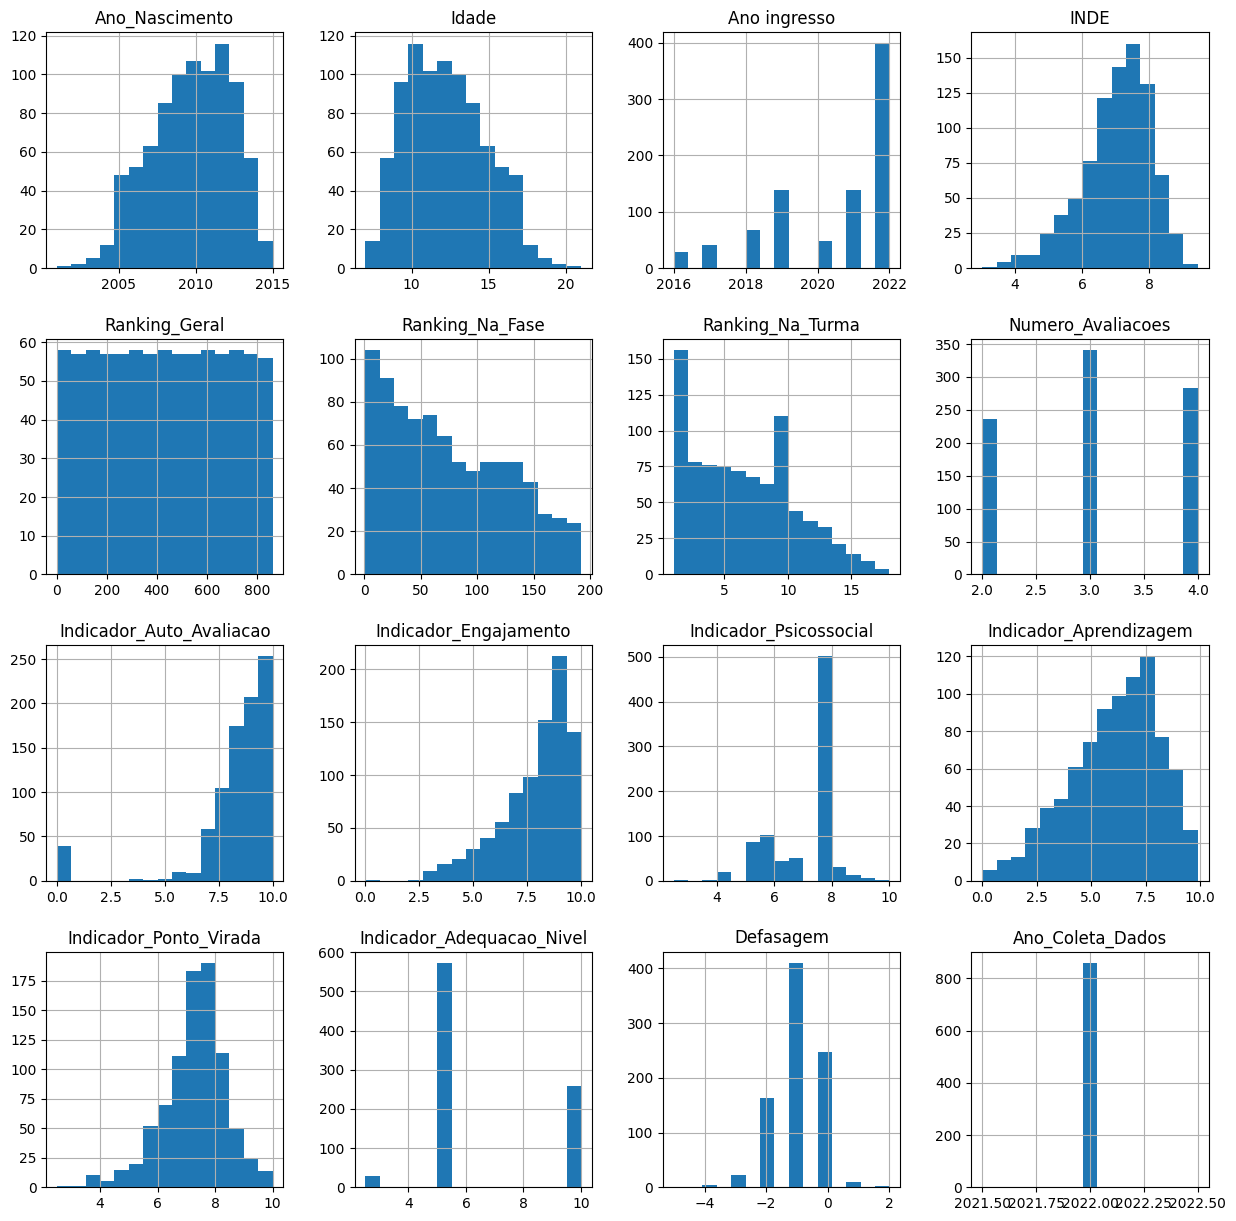

In [33]:
df.hist(bins=15,figsize=(15,15))
plt.show()

In [34]:
# vamos separar uma parte da base para teste antes mesmo de começar a mexer com outras análises
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
train_set.head(2)

,RA,Turma,Nome,Ano_Nascimento,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra,INDE,...,Indicador_Aprendizagem,Indicado,Atingiu PV,Indicador_Ponto_Virada,Indicador_Adequacao_Nivel,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Ano_Coleta_Dados
7,RA-8,A,Aluno-8,2002,20,Menina,2018,Escola Pública,Quartzo,4.786,...,1.6,Não,Não,6.278,5.0,-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022
192,RA-193,B,Aluno-193,2010,12,Menino,2016,Rede Decisão,Topázio,8.155,...,6.7,Não,Sim,8.500,10.0,0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,2022


In [36]:
train_set.describe()

,Ano_Nascimento,Idade,Ano ingresso,INDE,Ranking_Geral,Ranking_Na_Fase,Ranking_Na_Turma,Numero_Avaliacoes,Indicador_Auto_Avaliacao,Indicador_Engajamento,Indicador_Psicossocial,Indicador_Aprendizagem,Indicador_Ponto_Virada,Indicador_Adequacao_Nivel,Defasagem,Ano_Coleta_Dados
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.00000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.0
mean,2009.856105,12.143895,2020.514535,7.040219,430.460756,75.510174,6.643895,3.05814,8.230669,7.897529,6.905087,6.104651,7.264919,6.446221,-0.938953,2022.0
std,2.774062,2.774062,1.759919,1.006311,247.457084,52.168353,3.961561,0.77222,2.154216,1.625401,1.070004,2.004270,1.066200,2.397388,0.852632,0.0
min,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.00000,0.000000,0.000000,2.500000,0.000000,2.500000,2.500000,-5.000000,2022.0
25%,2008.000000,10.000000,2019.000000,6.489500,215.750000,30.000000,3.000000,2.00000,7.900000,7.000000,6.300000,4.800000,6.778000,5.000000,-1.000000,2022.0
50%,2010.000000,12.000000,2021.000000,7.182500,435.500000,67.000000,6.000000,3.00000,8.800000,8.300000,7.500000,6.300000,7.333000,5.000000,-1.000000,2022.0
75%,2012.000000,14.000000,2022.000000,7.751250,644.250000,117.000000,10.000000,4.00000,9.500000,9.100000,7.500000,7.600000,7.917000,10.000000,0.000000,2022.0
max,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.00000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,2.000000,2022.0


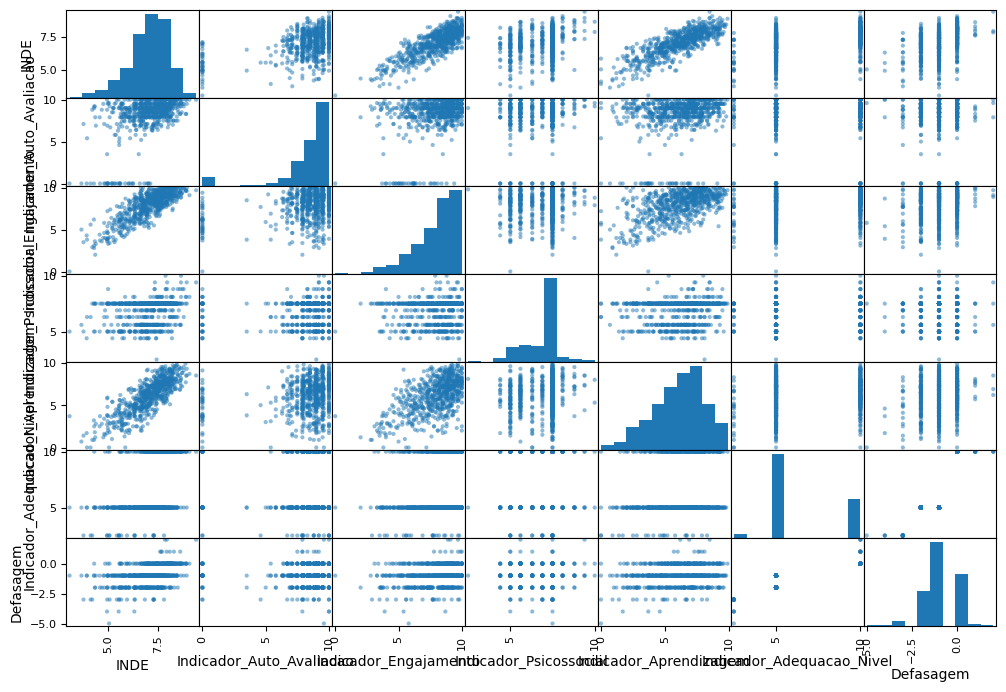

In [37]:
# checando correlação
from pandas.plotting import scatter_matrix

attributes = ["INDE","Indicador_Auto_Avaliacao","Indicador_Engajamento","Indicador_Psicossocial","Indicador_Aprendizagem","Indicador_Adequacao_Nivel","Defasagem"]
scatter_matrix(train_set[attributes], figsize=(12,8))
plt.show()

<Axes: >

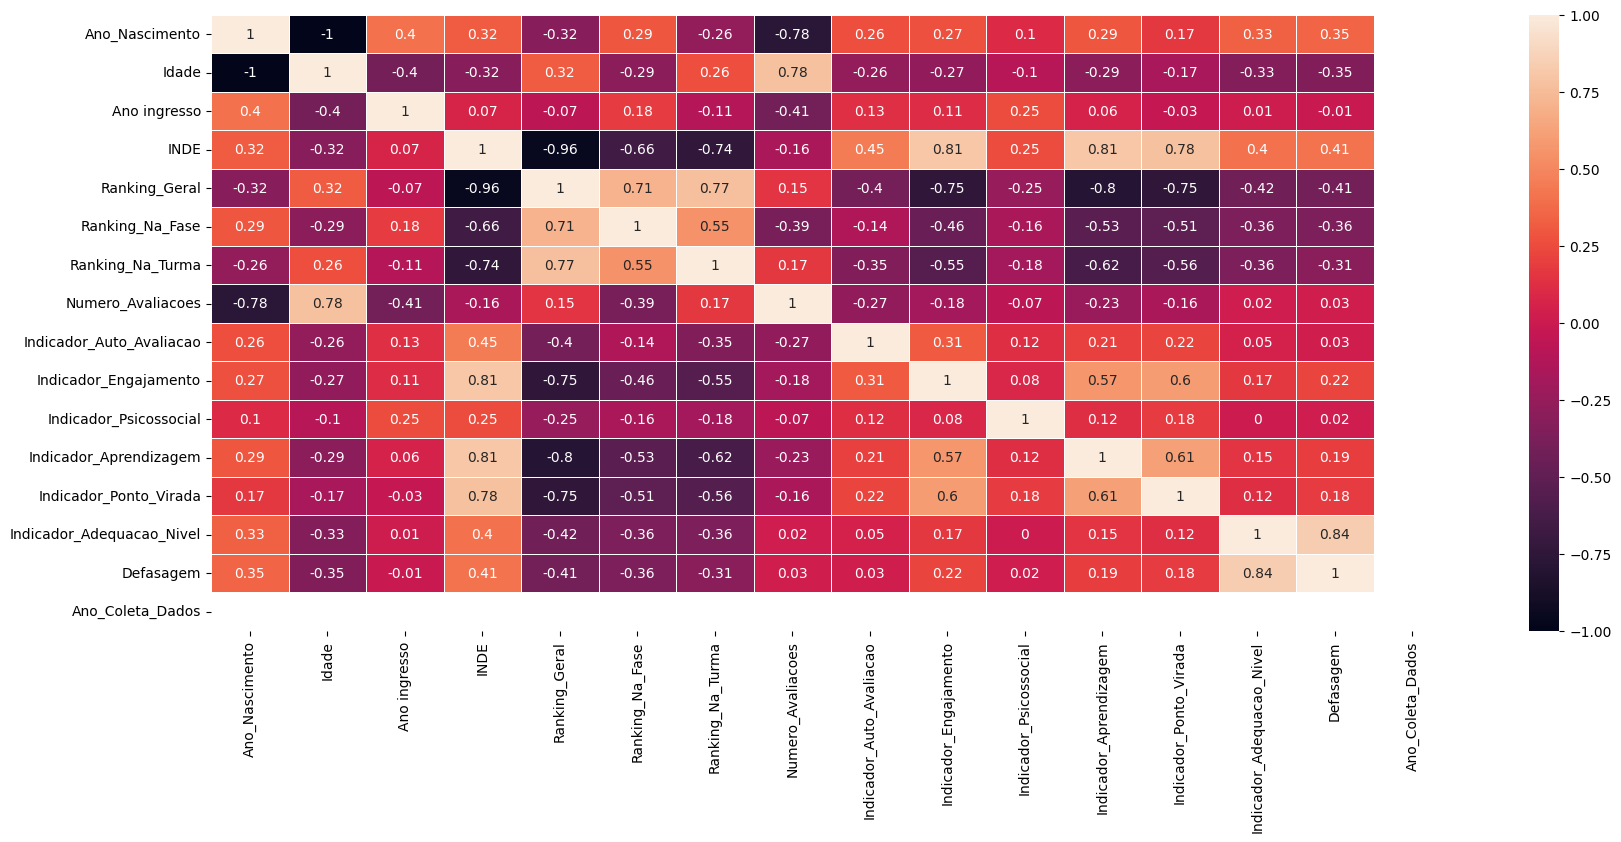

In [42]:
numeric_df = train_set.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr().round(2)
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)